In [4]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.4 MB/s eta 0:00:00


In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
from faker import Faker

**DATA** **GENERATION**

In [6]:
# Initialize Faker for generating fake data
fake = Faker()

In [7]:
# Define Base List
categories = {
    "Furniture": ["Office Chair","Study Table","Sofa","Bookshelf","Dining Table"],
    "Office Supplies": ["Pen","Notebook","Stapler","File Folder","Calculator"],
    "Electronics": ["Laptop","Keyboard","Mouse","Headphones","Monitor"],
    "Groceries": ["Rice Bag", "Cooking Oil","Sugar","Snacks","Juice Pack"]
}

regions = ["North","South","East","West"]
payment_modes = ["Cash","Credit Card","UPI","NetBanking"]
delivery_status = ["Delivered","Pending","Returned","Cancelled"]
customer_segments = ["Consumer","Corporate","Home Office"]


In [8]:
# Generating Datasets
records = []
for i in range(1000):
  order_id = f"ORD{1000+i}"
  order_date = fake.date_between(start_date = '-2y', end_date = 'today')
  ship_date = order_date + pd.Timedelta(days=random.randint(1,7))

  customer_name = fake.name()
  customer_id = f"CUST{random.randint(100,999)}"
  customer_segment = random.choice(customer_segments)

  category = random.choice(list(categories.keys()))
  product_name = random.choice(categories[category])
  product_id = f"PROD{random.randint(1000,9999)}"

  region = random.choice(regions)
  state = fake.state()
  city = fake.city()

  quantity = random.randint(1,10)
  unit_price = random.randint(100,5000)
  discount = random.choice([0,5,10,15,20])

  sales_amount = quantity*unit_price*(1-discount/100)
  cost_price =sales_amount*random.uniform(0.6,0.9)
  profit = sales_amount - cost_price

  stock_left = random.randint(0,50)

  if stock_left < 10:
    auto_reorder = "yes"
    reorder_quantity = random.randint(20,50)
  else:
    auto_reorder = "no"
    reorder_quantity = 0

  supplier_name = fake.company()
  supplier_email = fake.company_email()
  payment_mode = random.choice(payment_modes)
  delivery = random.choice(delivery_status)

  # Append Row as a dictionary
  records.append({
    "Order ID": order_id,
    "Order Date": order_date,
    "Ship Date": ship_date,
    "Customer ID": customer_id,
    "Customer Name": customer_name,
    "Customer Segment": customer_segment,
    "Product ID": product_id,
    "Product Name": product_name,
    "Category": category,
    "Region": region,
    "State": state,
    "City": city,
    "Quantity": quantity,
    "Unit Price": unit_price,
    "Discount": discount,
    "Sales Amount": round(sales_amount,2),
    "Cost Price": round(cost_price,2),
    "Profit": round(profit,2),
    "Payment Mode": payment_mode,
    "Delivery Status": delivery,
    "Supplier Name": supplier_name,
    "Supplier Email": supplier_email,
    "Stock Left": stock_left,
    "Auto Reorder": auto_reorder,
    "Reorder Quantity": reorder_quantity,
  })

In [9]:
# Create DataFrame and Save to CSV
df = pd.DataFrame(records)
try:
  df.to_csv("sales_data.csv",index=False)
  print("Data saved successfully! File saved as 'sales_data.csv'")
except Exception as e:
  print(e)


Data saved successfully! File saved as 'sales_data.csv'


**EDA ON GENERATED SALES DATASET**

In [10]:
# Import Dataset
df = pd.read_csv("sales_data.csv")
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Category,Region,...,Sales Amount,Cost Price,Profit,Payment Mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Reorder,Reorder Quantity
0,ORD1000,2025-10-06,2025-10-09,CUST335,Shannon Alexander,Corporate,PROD2517,Pen,Office Supplies,East,...,1493.1,1293.08,200.02,Cash,Returned,King-Frank,petersanders@garcia.com,14,no,0
1,ORD1001,2024-10-20,2024-10-23,CUST410,Dawn Fisher,Consumer,PROD7370,Notebook,Office Supplies,North,...,5731.2,5062.89,668.31,NetBanking,Cancelled,Brooks-Cross,fflowers@herrera-jones.com,42,no,0
2,ORD1002,2024-08-22,2024-08-24,CUST779,Stephanie Nguyen,Consumer,PROD1329,Mouse,Electronics,East,...,2840.8,2142.86,697.94,Credit Card,Returned,Garza and Sons,mccallrobin@patterson-foster.com,34,no,0
3,ORD1003,2025-01-23,2025-01-28,CUST675,James Costa,Consumer,PROD2973,Stapler,Office Supplies,North,...,35368.5,26678.24,8690.26,Credit Card,Returned,Richardson-Mendez,catherine58@harris-carpenter.org,13,no,0
4,ORD1004,2023-10-31,2023-11-06,CUST206,Gabrielle Clark,Corporate,PROD7658,Dining Table,Furniture,North,...,29649.6,19458.24,10191.36,Credit Card,Returned,Kim Ltd,patelkenneth@young-mcintosh.net,4,yes,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORD1995,2024-08-13,2024-08-18,CUST122,David Rosales,Home Office,PROD4805,Stapler,Office Supplies,South,...,929.6,725.18,204.42,UPI,Pending,Cordova Group,traceystevens@howard.com,46,no,0
996,ORD1996,2025-03-16,2025-03-20,CUST203,Dr. Thomas Taylor,Corporate,PROD2182,Cooking Oil,Groceries,North,...,960.0,753.37,206.63,UPI,Pending,"Gonzalez, Lane and Smith",douglas90@villarreal.com,47,no,0
997,ORD1997,2025-10-05,2025-10-11,CUST909,Heather Underwood,Home Office,PROD9998,Notebook,Office Supplies,North,...,13870.0,11458.45,2411.55,Credit Card,Returned,"Moore, House and Lamb",margaret17@rivera-brown.com,29,no,0
998,ORD1998,2024-10-23,2024-10-26,CUST220,Misty Keller,Home Office,PROD7961,Laptop,Electronics,North,...,15925.8,12427.37,3498.43,Credit Card,Pending,Campos Inc,jennifergutierrez@young-smith.com,40,no,0


In [11]:
# Finding Head
df.head()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Category,Region,...,Sales Amount,Cost Price,Profit,Payment Mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Reorder,Reorder Quantity
0,ORD1000,2025-10-06,2025-10-09,CUST335,Shannon Alexander,Corporate,PROD2517,Pen,Office Supplies,East,...,1493.1,1293.08,200.02,Cash,Returned,King-Frank,petersanders@garcia.com,14,no,0
1,ORD1001,2024-10-20,2024-10-23,CUST410,Dawn Fisher,Consumer,PROD7370,Notebook,Office Supplies,North,...,5731.2,5062.89,668.31,NetBanking,Cancelled,Brooks-Cross,fflowers@herrera-jones.com,42,no,0
2,ORD1002,2024-08-22,2024-08-24,CUST779,Stephanie Nguyen,Consumer,PROD1329,Mouse,Electronics,East,...,2840.8,2142.86,697.94,Credit Card,Returned,Garza and Sons,mccallrobin@patterson-foster.com,34,no,0
3,ORD1003,2025-01-23,2025-01-28,CUST675,James Costa,Consumer,PROD2973,Stapler,Office Supplies,North,...,35368.5,26678.24,8690.26,Credit Card,Returned,Richardson-Mendez,catherine58@harris-carpenter.org,13,no,0
4,ORD1004,2023-10-31,2023-11-06,CUST206,Gabrielle Clark,Corporate,PROD7658,Dining Table,Furniture,North,...,29649.6,19458.24,10191.36,Credit Card,Returned,Kim Ltd,patelkenneth@young-mcintosh.net,4,yes,50


In [12]:
# Finding Tail
df.tail()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Category,Region,...,Sales Amount,Cost Price,Profit,Payment Mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Reorder,Reorder Quantity
995,ORD1995,2024-08-13,2024-08-18,CUST122,David Rosales,Home Office,PROD4805,Stapler,Office Supplies,South,...,929.6,725.18,204.42,UPI,Pending,Cordova Group,traceystevens@howard.com,46,no,0
996,ORD1996,2025-03-16,2025-03-20,CUST203,Dr. Thomas Taylor,Corporate,PROD2182,Cooking Oil,Groceries,North,...,960.0,753.37,206.63,UPI,Pending,"Gonzalez, Lane and Smith",douglas90@villarreal.com,47,no,0
997,ORD1997,2025-10-05,2025-10-11,CUST909,Heather Underwood,Home Office,PROD9998,Notebook,Office Supplies,North,...,13870.0,11458.45,2411.55,Credit Card,Returned,"Moore, House and Lamb",margaret17@rivera-brown.com,29,no,0
998,ORD1998,2024-10-23,2024-10-26,CUST220,Misty Keller,Home Office,PROD7961,Laptop,Electronics,North,...,15925.8,12427.37,3498.43,Credit Card,Pending,Campos Inc,jennifergutierrez@young-smith.com,40,no,0
999,ORD1999,2025-04-25,2025-04-29,CUST474,Julia Moyer,Corporate,PROD2954,File Folder,Office Supplies,North,...,18978.3,15408.88,3569.42,UPI,Returned,"Little, Lambert and Gonzalez",daniellefernandez@nguyen.net,41,no,0


In [13]:
# Finding type
f'Data Type is {type(df)}'

"Data Type is <class 'pandas.core.frame.DataFrame'>"

In [14]:
# Finding DataType for Each Columns
df.dtypes

,0
Order ID,object
Order Date,object
Ship Date,object
Customer ID,object
Customer Name,object
Customer Segment,object
Product ID,object
Product Name,object
Category,object
Region,object


In [15]:
# Finding Random Sample From Dataset
df.sample()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Category,Region,...,Sales Amount,Cost Price,Profit,Payment Mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Reorder,Reorder Quantity
477,ORD1477,2025-04-29,2025-05-03,CUST685,Gregory Frank,Consumer,PROD7714,File Folder,Office Supplies,North,...,22073.25,18768.2,3305.05,UPI,Cancelled,"Brady, Barnes and Miller",reederin@moore.org,17,no,0


In [16]:
# Finding Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Order Date        1000 non-null   object 
 2   Ship Date         1000 non-null   object 
 3   Customer ID       1000 non-null   object 
 4   Customer Name     1000 non-null   object 
 5   Customer Segment  1000 non-null   object 
 6   Product ID        1000 non-null   object 
 7   Product Name      1000 non-null   object 
 8   Category          1000 non-null   object 
 9   Region            1000 non-null   object 
 10  State             1000 non-null   object 
 11  City              1000 non-null   object 
 12  Quantity          1000 non-null   int64  
 13  Unit Price        1000 non-null   int64  
 14  Discount          1000 non-null   int64  
 15  Sales Amount      1000 non-null   float64
 16  Cost Price        1000 non-null   float64
 

In [17]:
# Finding All Columns Name
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Product ID', 'Product Name', 'Category', 'Region',
       'State', 'City', 'Quantity', 'Unit Price', 'Discount', 'Sales Amount',
       'Cost Price', 'Profit', 'Payment Mode', 'Delivery Status',
       'Supplier Name', 'Supplier Email', 'Stock Left', 'Auto Reorder',
       'Reorder Quantity'],
      dtype='object')

In [18]:
# Find All Data
pd.set_option('display.max_row', None)

In [19]:
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Category,Region,...,Sales Amount,Cost Price,Profit,Payment Mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Reorder,Reorder Quantity
0,ORD1000,2025-10-06,2025-10-09,CUST335,Shannon Alexander,Corporate,PROD2517,Pen,Office Supplies,East,...,1493.10,1293.08,200.02,Cash,Returned,King-Frank,petersanders@garcia.com,14,no,0
1,ORD1001,2024-10-20,2024-10-23,CUST410,Dawn Fisher,Consumer,PROD7370,Notebook,Office Supplies,North,...,5731.20,5062.89,668.31,NetBanking,Cancelled,Brooks-Cross,fflowers@herrera-jones.com,42,no,0
2,ORD1002,2024-08-22,2024-08-24,CUST779,Stephanie Nguyen,Consumer,PROD1329,Mouse,Electronics,East,...,2840.80,2142.86,697.94,Credit Card,Returned,Garza and Sons,mccallrobin@patterson-foster.com,34,no,0
3,ORD1003,2025-01-23,2025-01-28,CUST675,James Costa,Consumer,PROD2973,Stapler,Office Supplies,North,...,35368.50,26678.24,8690.26,Credit Card,Returned,Richardson-Mendez,catherine58@harris-carpenter.org,13,no,0
4,ORD1004,2023-10-31,2023-11-06,CUST206,Gabrielle Clark,Corporate,PROD7658,Dining Table,Furniture,North,...,29649.60,19458.24,10191.36,Credit Card,Returned,Kim Ltd,patelkenneth@young-mcintosh.net,4,yes,50
5,ORD1005,2023-11-13,2023-11-18,CUST722,Jonathan Hughes,Consumer,PROD1532,File Folder,Office Supplies,East,...,8944.00,5673.44,3270.56,Cash,Delivered,"Bush, Atkins and Robinson",russellsawyer@williams.biz,42,no,0
6,ORD1006,2024-07-08,2024-07-13,CUST429,Terry Lin,Home Office,PROD3186,File Folder,Office Supplies,East,...,2935.50,2335.77,599.73,NetBanking,Pending,Martinez and Sons,sandra13@gonzalez.info,4,yes,42
7,ORD1007,2025-08-09,2025-08-14,CUST169,Julie Smith,Corporate,PROD5600,Headphones,Electronics,North,...,390.15,309.45,80.70,Credit Card,Delivered,Green PLC,rebeccagutierrez@weaver-blankenship.com,38,no,0
8,ORD1008,2024-12-23,2024-12-29,CUST962,Gabriella Moran,Corporate,PROD4509,Mouse,Electronics,South,...,1762.90,1139.50,623.40,Credit Card,Pending,Jordan-Aguilar,jonestanya@carroll-hamilton.info,10,no,0
9,ORD1009,2025-01-13,2025-01-16,CUST325,Billy Barron,Consumer,PROD2335,Snacks,Groceries,West,...,12975.20,11667.69,1307.51,NetBanking,Pending,"Johnson, Walls and Gray",josephthompson@meadows.biz,28,no,0


In [20]:
# Finding Out the Shape of Dataset
f'There are total rows and columns is: {df.shape}'

'There are total rows and columns is: (1000, 25)'

In [21]:
# Finding Out Description of Dataset
df.describe(include = 'object')

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Category,Region,State,City,Payment Mode,Delivery Status,Supplier Name,Supplier Email,Auto Reorder
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,548,543,604,993,3,950,20,4,4,50,962,4,4,965,1000,2
top,ORD1999,2025-05-20,2024-12-18,CUST474,Heather Smith,Corporate,PROD3179,Snacks,Furniture,South,Maine,East Christopher,Cash,Delivered,Rodriguez LLC,daniellefernandez@nguyen.net,no
freq,1,5,5,5,2,347,3,62,274,259,32,4,273,272,4,1,809


In [22]:
# Finding Null Values
df.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Customer ID,0
Customer Name,0
Customer Segment,0
Product ID,0
Product Name,0
Category,0
Region,0


**Data Analysis**

In [23]:
# Data Quality Check

print("\n ****Data Quality Assessment****")
missing_data = df.isnull().sum()
print(missing_data[missing_data>0])

# check for duplicates
print(f"\n Duplicate Rows: {df.duplicated().sum()}")


 ****Data Quality Assessment****
Series([], dtype: int64)

 Duplicate Rows: 0


In [24]:
# DataType Conversion
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%Y-%m-%d')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%Y-%m-%d')

# Check Conversion
print("\n Date columns converted: \n")
print(f"Order Date: {df['Order Date'].dtype}")
print(f"Ship Date: {df['Ship Date'].dtype}")


 Date columns converted: 

Order Date: datetime64[ns]
Ship Date: datetime64[ns]



 === CATEGORICAL VARIABLES ===


Customer Segment:
Customer Segment
Corporate      347
Home Office    336
Consumer       317
Name: count, dtype: int64


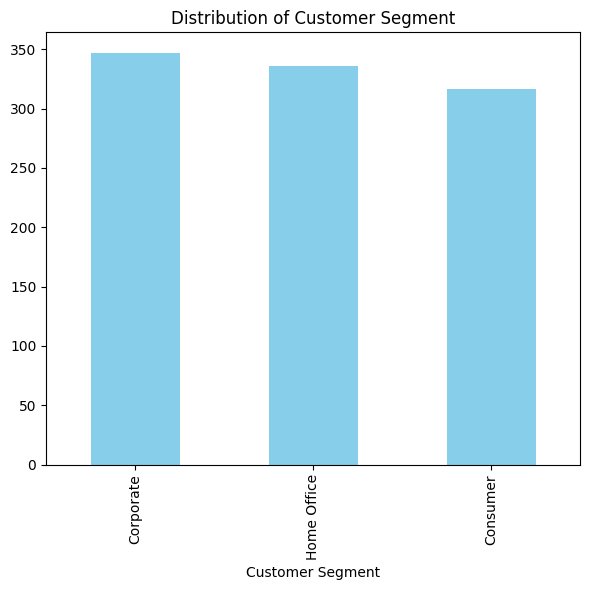


Category:
Category
Furniture          274
Office Supplies    246
Groceries          241
Electronics        239
Name: count, dtype: int64


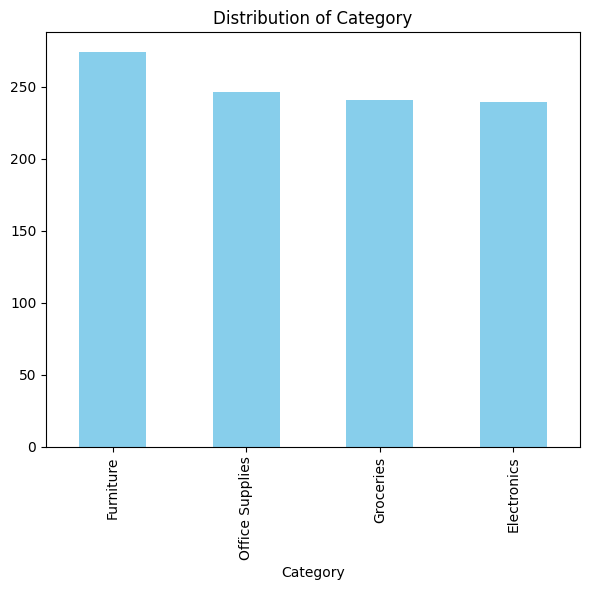


Region:
Region
South    259
North    257
East     250
West     234
Name: count, dtype: int64


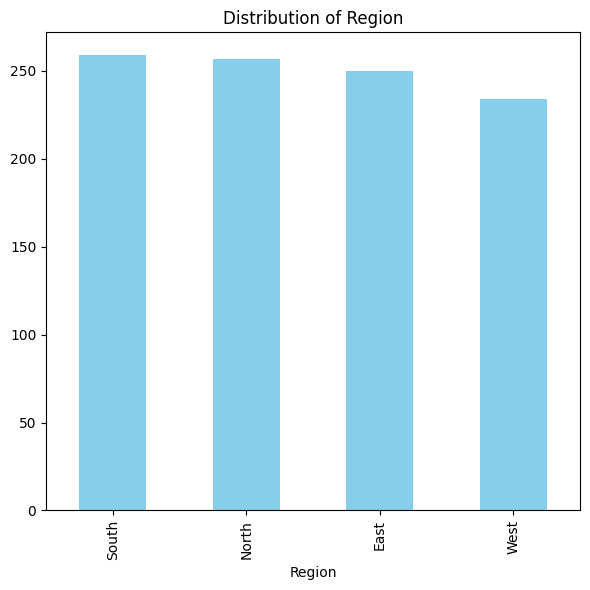


Payment Mode:
Payment Mode
Cash           273
Credit Card    264
UPI            235
NetBanking     228
Name: count, dtype: int64


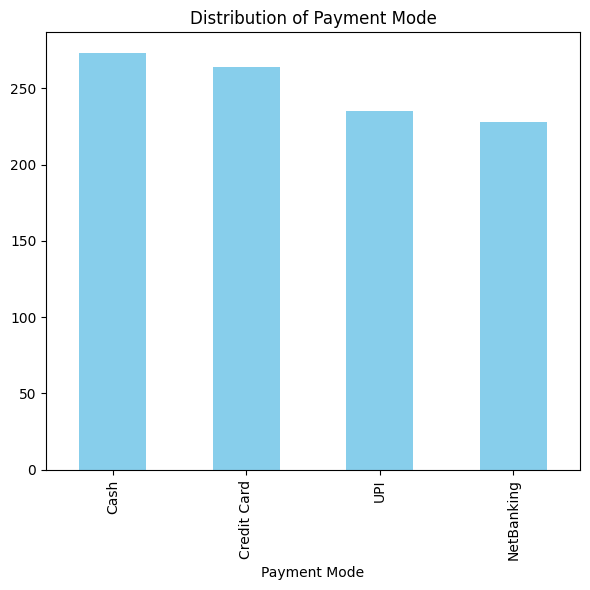


Delivery Status:
Delivery Status
Delivered    272
Cancelled    251
Pending      246
Returned     231
Name: count, dtype: int64


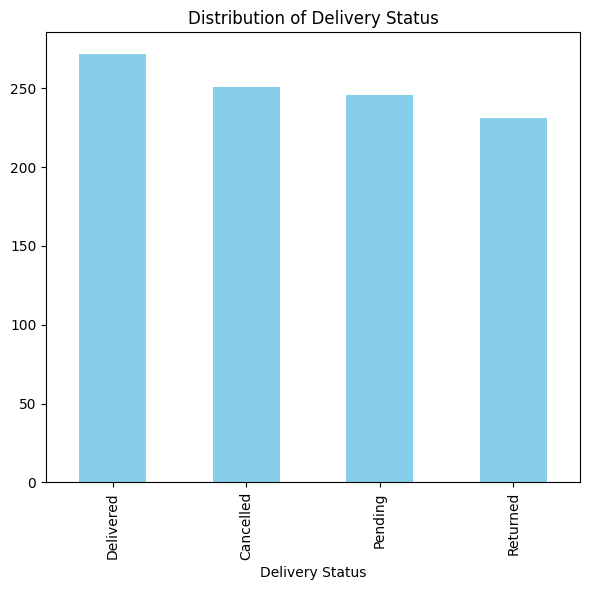


Auto Reorder:
Auto Reorder
no     809
yes    191
Name: count, dtype: int64


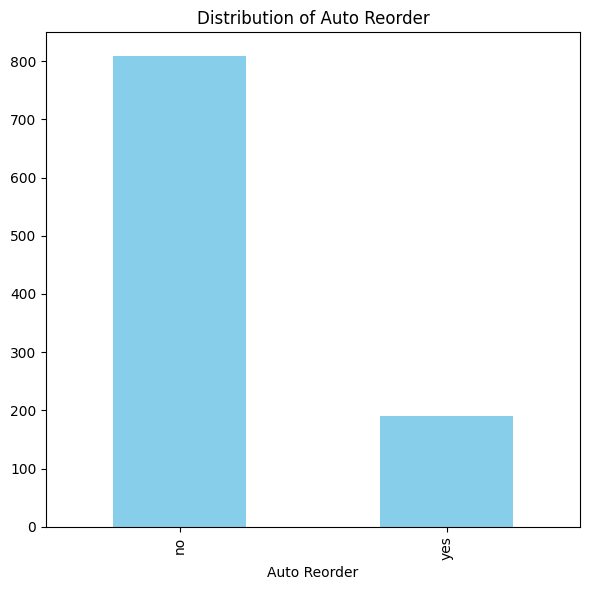

In [25]:
# Univariate Analysis
print("\n === CATEGORICAL VARIABLES ===\n")
categorical_cols = ['Customer Segment','Category','Region','Payment Mode','Delivery Status','Auto Reorder']
for col in categorical_cols:
  print(f"\n{col}:")
  print(df[col].value_counts())

  # Visualization
  plt.figure(figsize = (6,6))
  df[col].value_counts().plot(kind='bar', color='skyblue')
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()


 === NUMERICAL VARIABLES ===


Quantity:
Mean: 5.38
Median: 5.00
Std Dev: 2.86
Min: 1.00
Max: 10.00


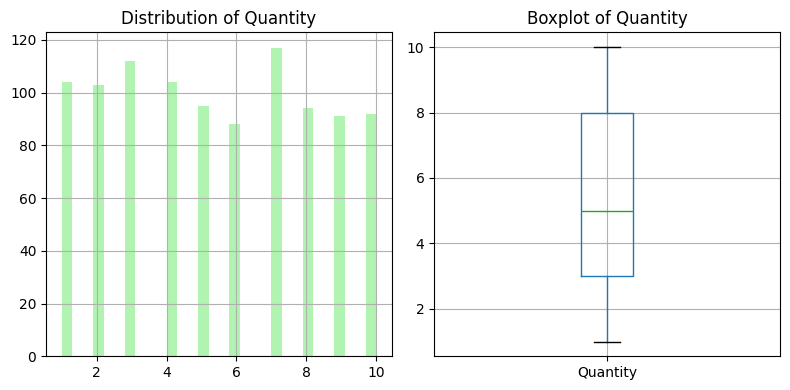


Unit Price:
Mean: 2483.34
Median: 2463.00
Std Dev: 1418.15
Min: 101.00
Max: 5000.00


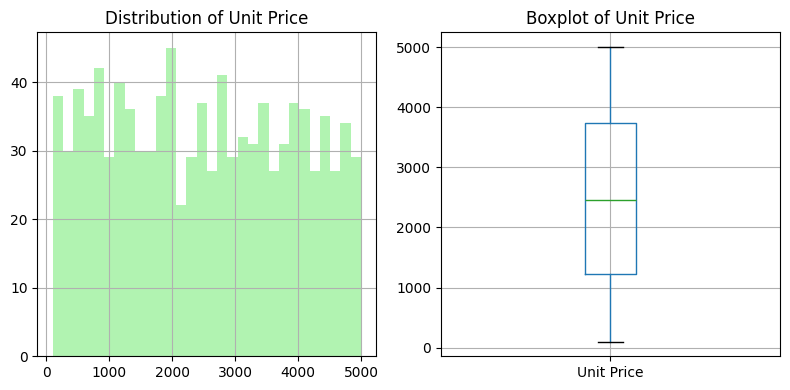


Discount:
Mean: 10.02
Median: 10.00
Std Dev: 7.11
Min: 0.00
Max: 20.00


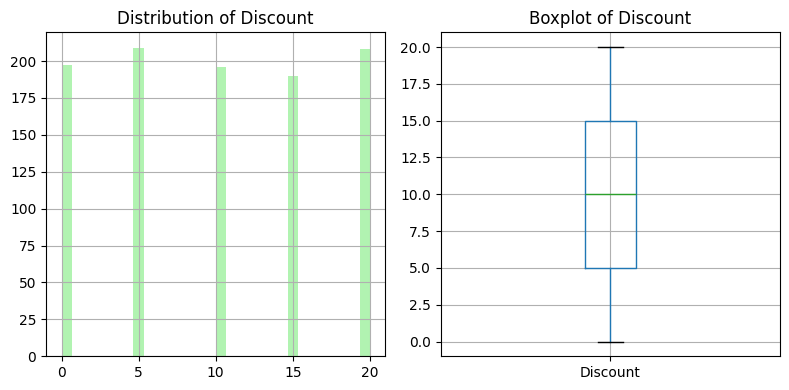


Sales Amount:
Mean: 12084.62
Median: 9075.05
Std Dev: 10249.84
Min: 125.40
Max: 48050.00


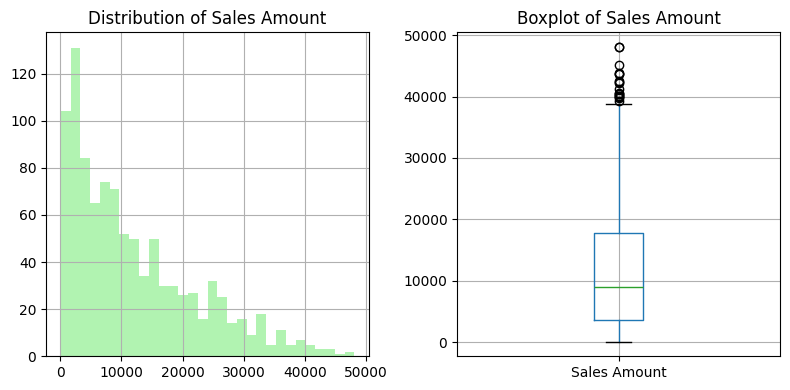


Cost Price:
Mean: 9073.25
Median: 6856.19
Std Dev: 7790.28
Min: 89.29
Max: 38998.10


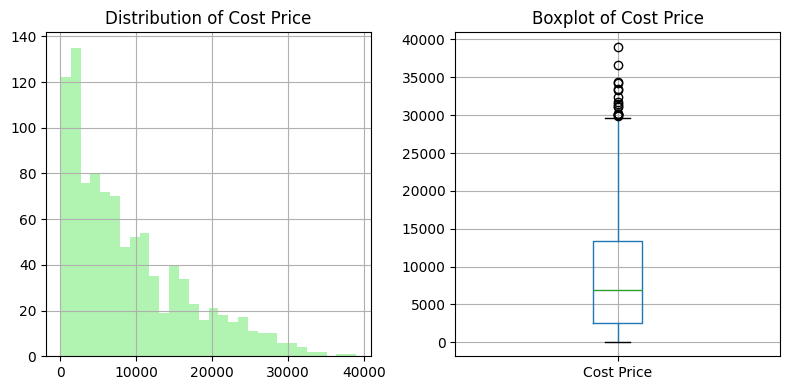


Profit:
Mean: 3011.36
Median: 2104.89
Std Dev: 2948.23
Min: 36.11
Max: 16564.53


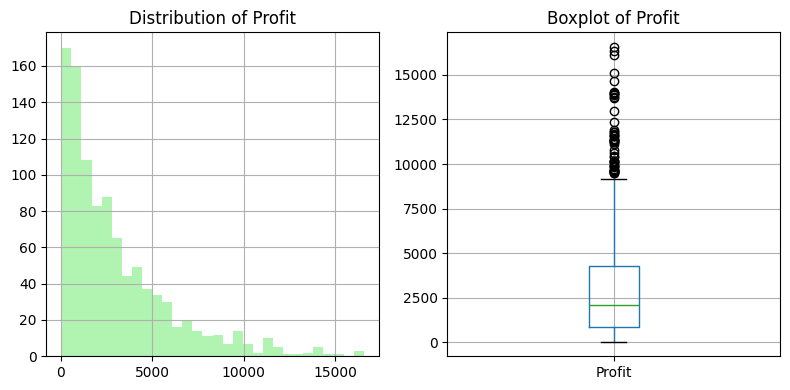


Stock Left:
Mean: 24.99
Median: 25.00
Std Dev: 14.58
Min: 0.00
Max: 50.00


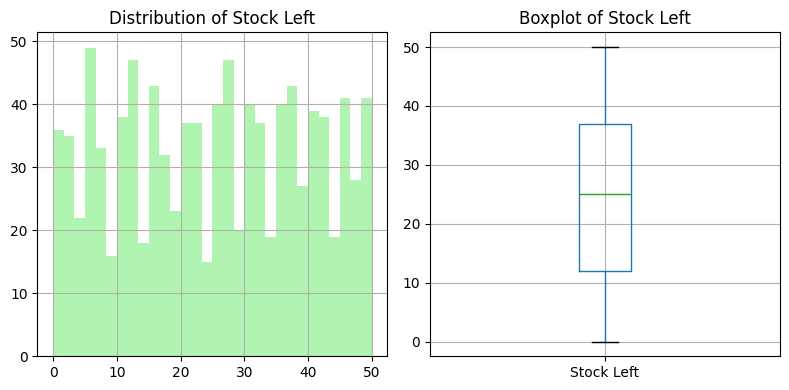


Reorder Quantity:
Mean: 6.57
Median: 0.00
Std Dev: 14.11
Min: 0.00
Max: 50.00


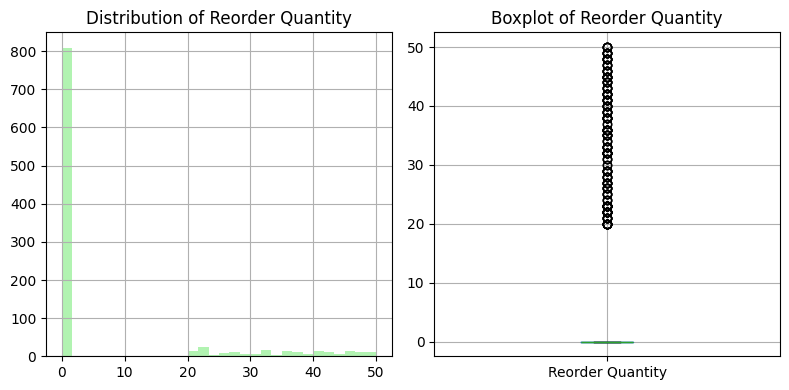

In [26]:
# Numerical Variables Analysis
print("\n === NUMERICAL VARIABLES ===\n")

numerical_cols = ['Quantity','Unit Price','Discount','Sales Amount','Cost Price','Profit','Stock Left','Reorder Quantity']

for col in numerical_cols:
  print(f"\n{col}:")
  print(f"Mean: {df[col].mean():.2f}")
  print(f"Median: {df[col].median():.2f}")
  print(f"Std Dev: {df[col].std():.2f}")
  print(f"Min: {df[col].min():.2f}")
  print(f"Max: {df[col].max():.2f}")

  # Visualization
  plt.figure(figsize=(8,4))

  plt.subplot(1,2,1)
  df[col].hist(bins=30, color='lightgreen', alpha= 0.7)
  plt.title(f'Distribution of {col}')

  plt.subplot(1,2,2)
  df.boxplot(column=col)
  plt.title(f'Boxplot of {col}')

  plt.tight_layout()
  plt.show()


 ===SALES AND PROFIT BY CATEGORY=== 

                 Sales Amount     Profit  Order Count  Profit Margin
Category                                                            
Electronics        2697373.30  642640.79          239      23.824689
Furniture          3559942.65  909044.64          274      25.535373
Groceries          2607933.80  664216.39          241      25.469066
Office Supplies    3219367.65  795461.57          246      24.708628


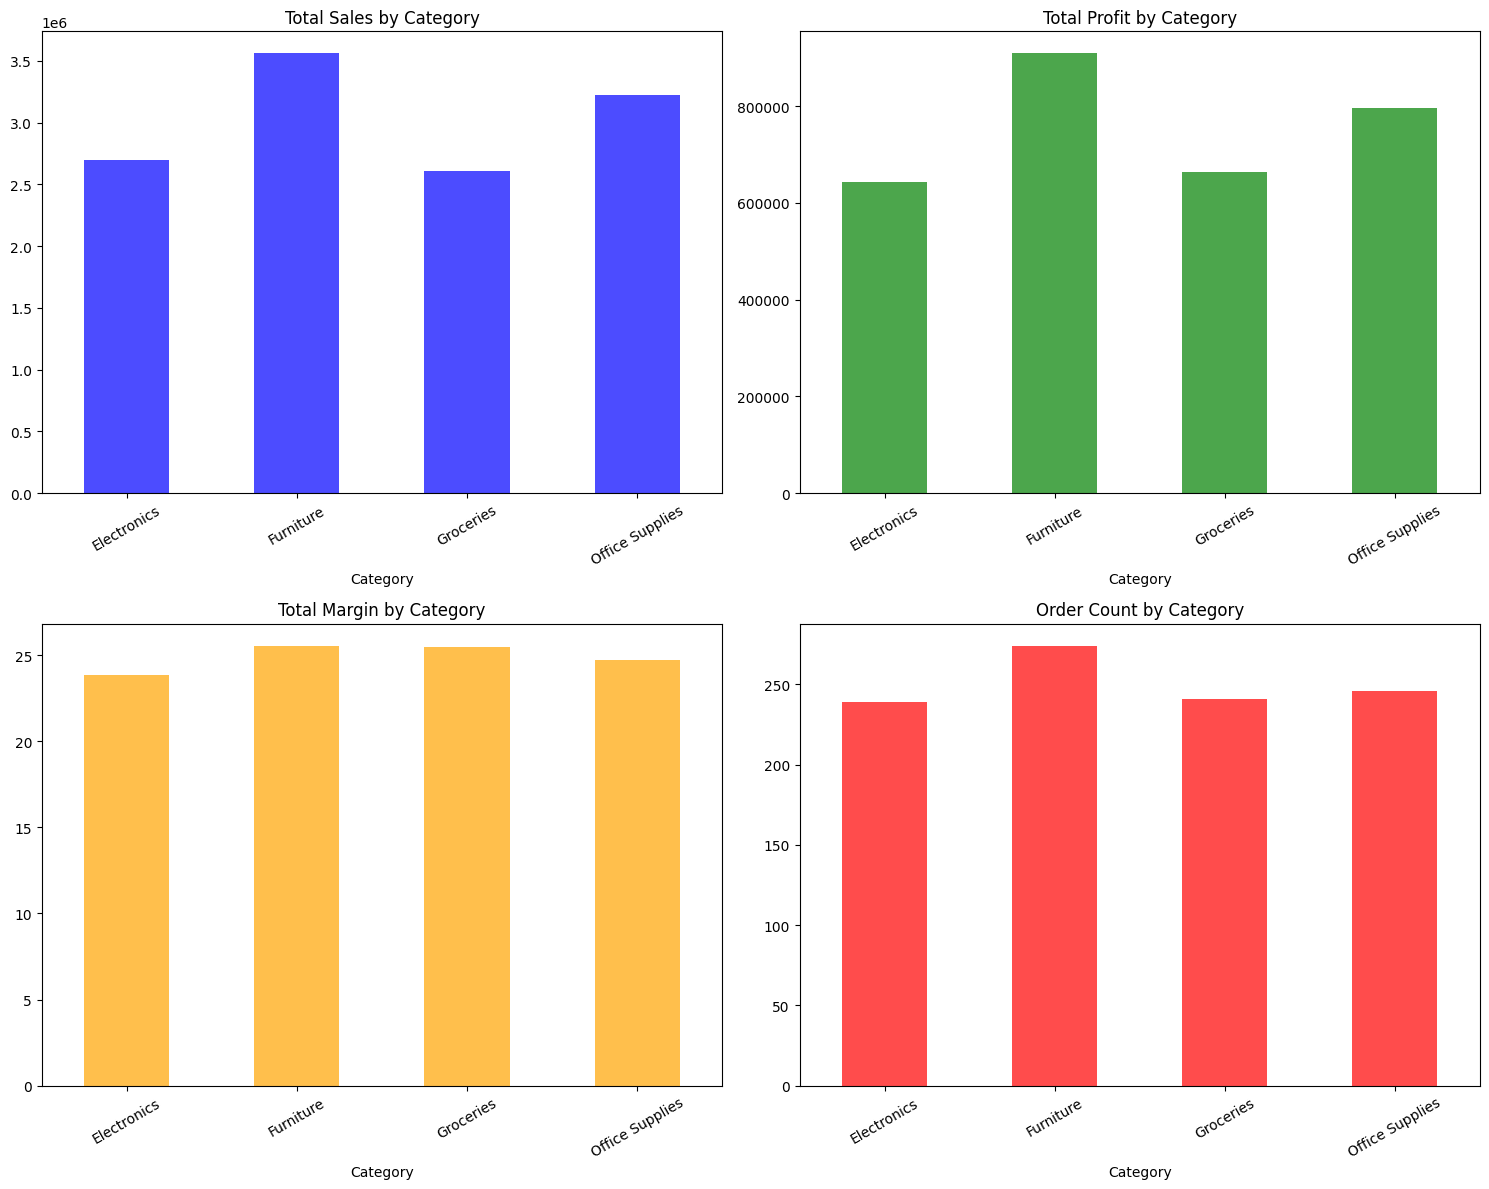

In [35]:
# Bivariate Analysis
print("\n ===SALES AND PROFIT BY CATEGORY=== \n")

catgegory_performance = df.groupby('Category').agg({
    'Sales Amount': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns = {'Order ID': 'Order Count'})
catgegory_performance['Profit Margin'] = (catgegory_performance['Profit']/catgegory_performance['Sales Amount'])*100
print(catgegory_performance)

# visualization
fig, ax = plt.subplots(2,2,figsize=(15,12))
# sales by category
catgegory_performance['Sales Amount'].plot(kind='bar', ax= ax[0,0], color='blue',alpha=0.7)
ax[0,0].set_title('Total Sales by Category')
ax[0,0].tick_params(axis='x',rotation=30)

# Profit by category
catgegory_performance['Profit'].plot(kind='bar', ax=ax[0,1], color='green',alpha=0.7)
ax[0,1].set_title('Total Profit by Category')
ax[0,1].tick_params(axis='x',rotation=30)

# Profit Margin
catgegory_performance['Profit Margin'].plot(kind='bar', ax=ax[1,0], color='Orange',alpha=0.7)
ax[1,0].set_title('Total Margin by Category')
ax[1,0].tick_params(axis='x',rotation=30)

# Order Count
catgegory_performance['Order Count'].plot(kind='bar', ax=ax[1,1], color='red',alpha=0.7)
ax[1,1].set_title('Order Count by Category')
ax[1,1].tick_params(axis='x',rotation=30)

plt.tight_layout()
plt.show()


 ===Regional Performance=== 

        Sales Amount     Profit  Order Count  Profit Margin
Region                                                     
East      3068385.65  750755.80          250      24.467452
North     3104240.45  783573.24          257      25.242028
South     3150802.85  768242.02          259      24.382421
West      2761188.45  708792.33          234      25.669828


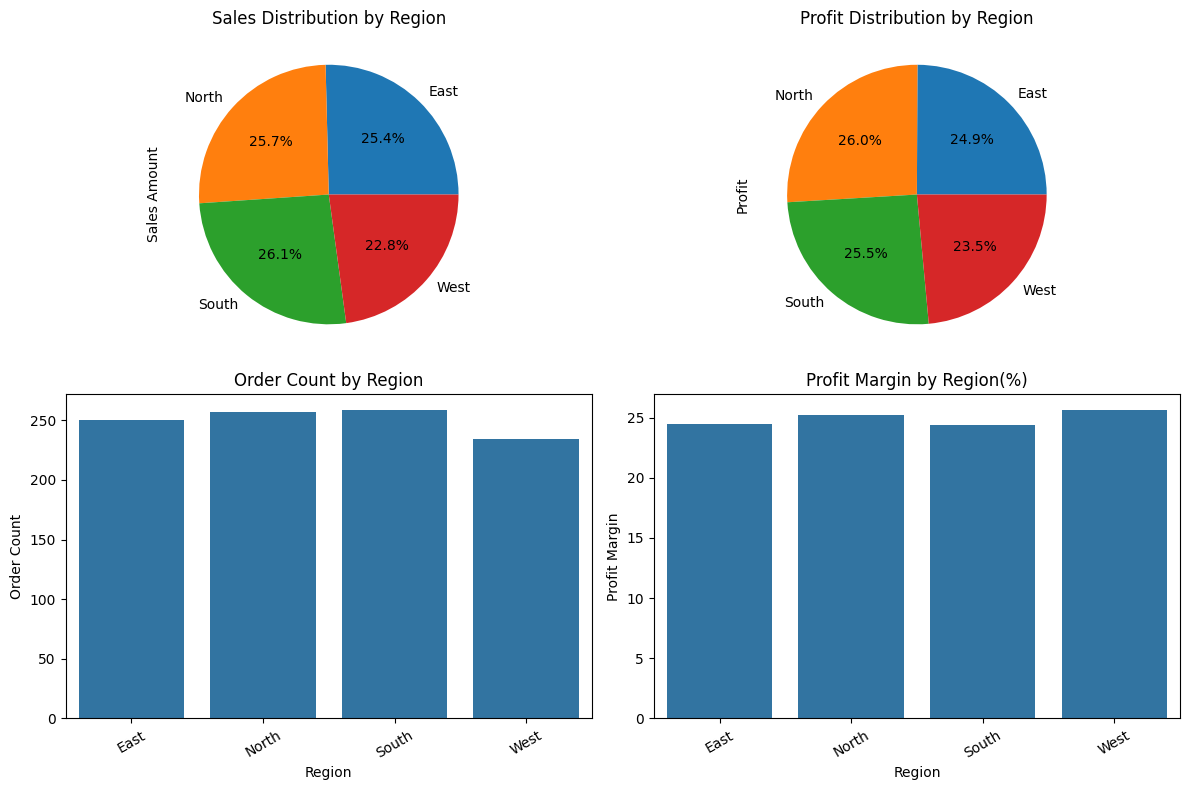

In [36]:
# Regional Performance
print("\n ===Regional Performance=== \n")
regional_performance = df.groupby('Region').agg({
    'Sales Amount': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
    }).rename(columns = {'Order ID': 'Order Count'})

regional_performance['Profit Margin'] = (regional_performance['Profit']/regional_performance['Sales Amount'])*100
print(regional_performance)

# visualization
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
regional_performance['Sales Amount'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')

plt.subplot(2,2,2)
regional_performance['Profit'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Profit Distribution by Region')

plt.subplot(2,2,3)
sns.barplot(x=regional_performance.index, y='Order Count', data=regional_performance)
plt.title('Order Count by Region')
plt.xticks(rotation=30)

plt.subplot(2,2,4)
sns.barplot(x=regional_performance.index, y='Profit Margin', data=regional_performance)
plt.title('Profit Margin by Region(%)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


 ===Time Series Analysis=== 

Monthly Trends
             Sales Amount     Profit  Order Count
Order Month                                      
2025-01         701667.60  168858.18           48
2025-02         596722.20  130575.97           37
2025-03         583497.50  144004.97           53
2025-04         399295.15   98701.40           34
2025-05         450396.15  109056.53           45
2025-06         504928.55  138658.65           45
2025-07         464794.95  116632.93           40
2025-08         690773.50  182730.15           47
2025-09         362734.95   91788.07           36
2025-10         551223.15  124691.33           47 




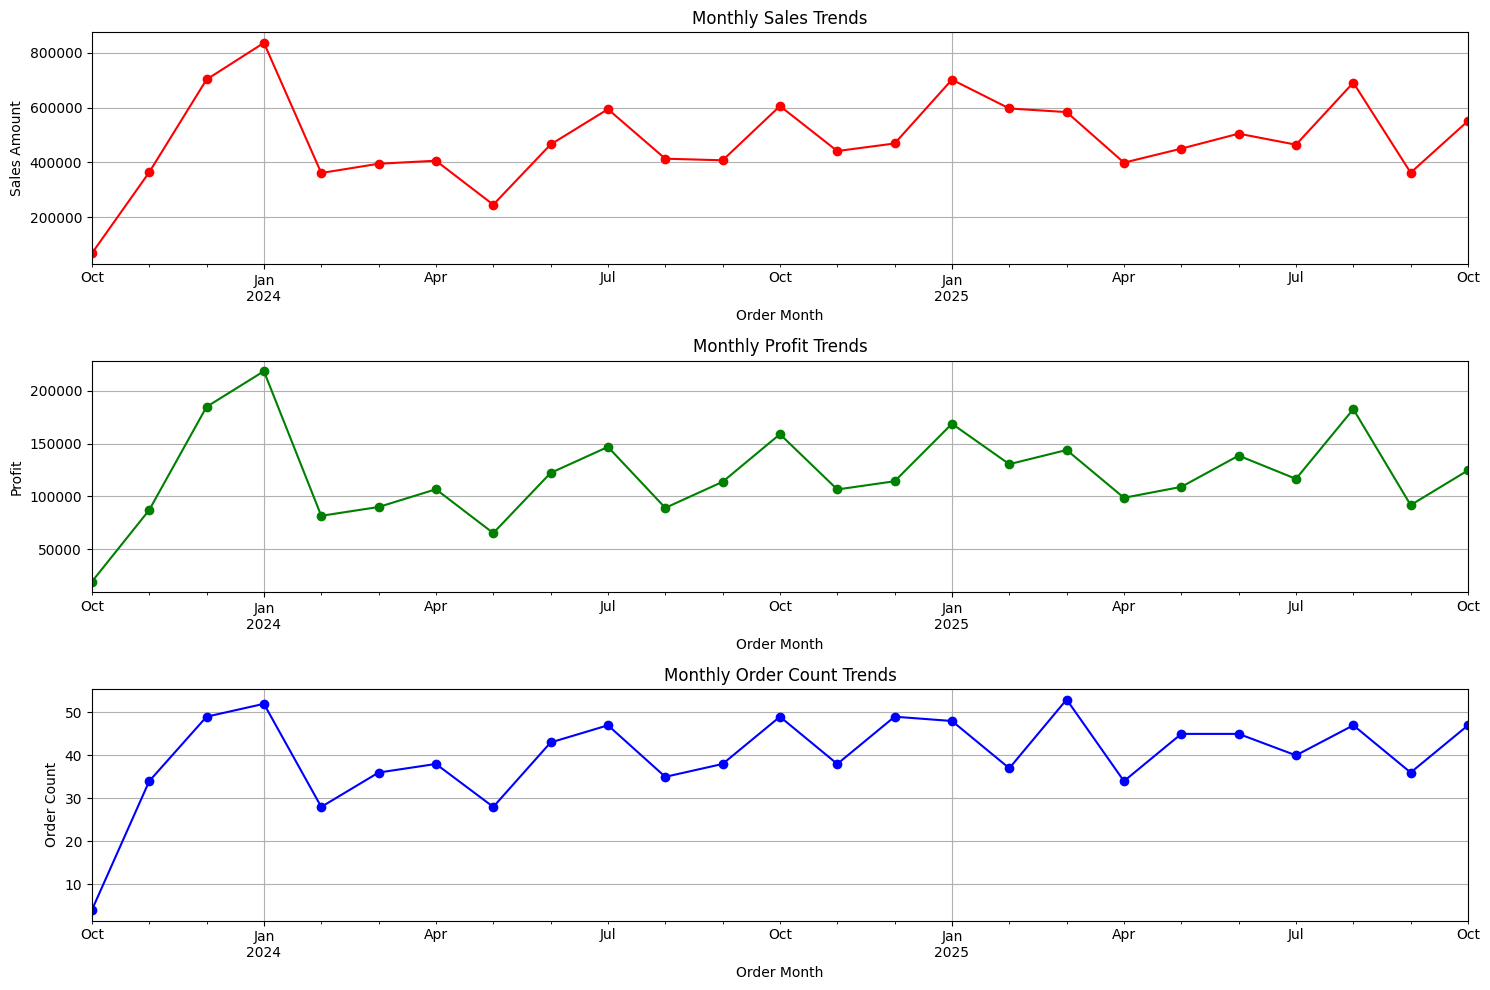

In [39]:
# Time Series Analysis
print("\n ===Time Series Analysis=== \n")

# Extract time components
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Monthly trends
monthly_trends = df.groupby('Order Month').agg({
    'Sales Amount': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns = {'Order ID': 'Order Count'})

print("Monthly Trends")
print(monthly_trends.tail(10),'\n\n')

# Visualization
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
monthly_trends['Sales Amount'].plot(kind='line', color='Red', marker='o')
plt.title('Monthly Sales Trends')
plt.ylabel('Sales Amount')
plt.grid(True)

plt.subplot(3,1,2)
monthly_trends['Profit'].plot(kind='line', color='green', marker='o')
plt.title('Monthly Profit Trends')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(3,1,3)
monthly_trends['Order Count'].plot(kind='line',color ='blue', marker='o')
plt.title('Monthly Order Count Trends')
plt.ylabel('Order Count')
plt.grid(True)

plt.tight_layout()
plt.show()


 ===ADVANCED ANALYSIS=== 

Correlation Matrix:
              Quantity  Unit Price  Discount  Sales Amount  Cost Price  \
Quantity      1.000000    0.015552  0.017215      0.635613    0.625686   
Unit Price    0.015552    1.000000 -0.028101      0.684543    0.677143   
Discount      0.017215   -0.028101  1.000000     -0.111314   -0.106313   
Sales Amount  0.635613    0.684543 -0.111314      1.000000    0.983452   
Cost Price    0.625686    0.677143 -0.106313      0.983452    1.000000   
Profit        0.556489    0.590632 -0.106076      0.877973    0.776717   

                Profit  
Quantity      0.556489  
Unit Price    0.590632  
Discount     -0.106076  
Sales Amount  0.877973  
Cost Price    0.776717  
Profit        1.000000   




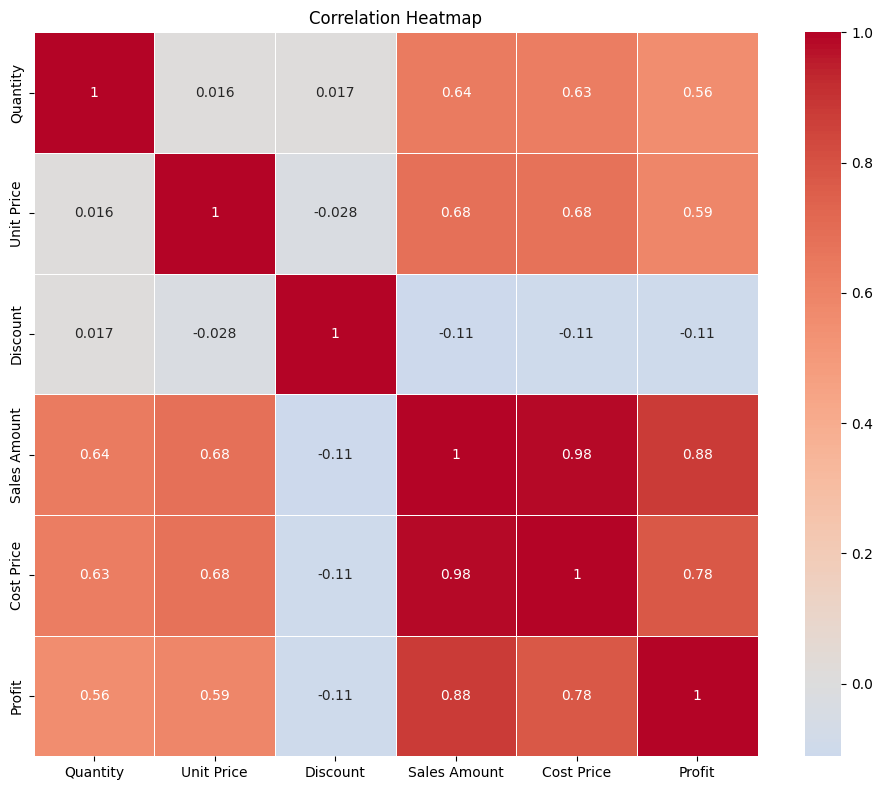

In [41]:
# Advanced Analysis
print("\n ===ADVANCED ANALYSIS=== \n")

# Select numerical columns for correlation
numerical_df = df[['Quantity','Unit Price','Discount','Sales Amount','Cost Price','Profit']]

# Correlation matrix
correlation_matrix = numerical_df.corr()
print("Correlation Matrix:")
print(correlation_matrix,'\n\n')

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


 ===CUSTOMER SEGMENT ANALYSIS=== 

                  Total Sales  Avg Sales  Total Profit  Avg Profit  \
Customer Segment                                                     
Consumer           3857768.85   12169.62     972837.29     3068.89   
Corporate          4306370.35   12410.29    1066374.33     3073.12   
Home Office        3920478.20   11668.09     972151.77     2893.31   

                  Order Count  Avg Discount  
Customer Segment                             
Consumer                  317         10.54  
Corporate                 347          9.57  
Home Office               336          9.99   




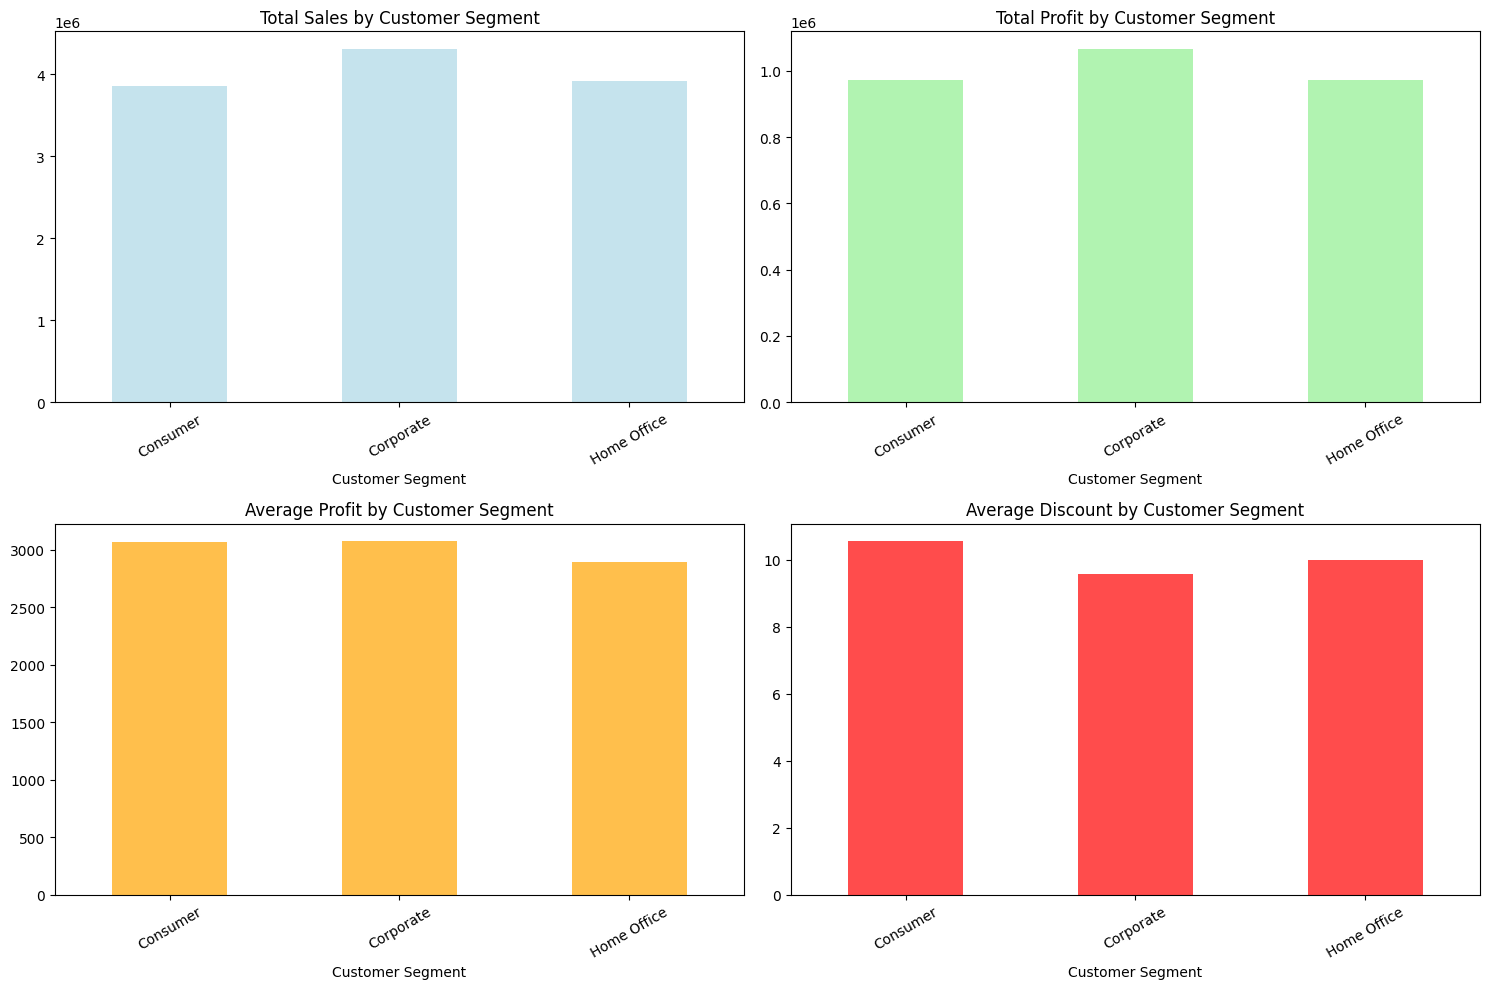

In [43]:
# Customer Segment Analysis

print("\n ===CUSTOMER SEGMENT ANALYSIS=== \n")

segment_analysis = df.groupby('Customer Segment').agg({
    'Sales Amount': ['sum','mean'],
    'Profit': ['sum','mean'],
    'Order ID': 'count',
    'Discount': 'mean'
}).round(2)

segment_analysis.columns = ['Total Sales','Avg Sales','Total Profit','Avg Profit','Order Count','Avg Discount']
print(segment_analysis,'\n\n')

# Visualization
fig, ax = plt.subplots(2,2, figsize=(15,10))

segment_analysis['Total Sales'].plot(kind='bar', ax=ax[0,0], color='lightblue', alpha=0.7)
ax[0,0].set_title('Total Sales by Customer Segment')
ax[0,0].tick_params(axis='x',rotation=30)

segment_analysis['Total Profit'].plot(kind='bar', ax=ax[0,1],color='lightgreen', alpha=0.7)
ax[0,1].set_title('Total Profit by Customer Segment')
ax[0,1].tick_params(axis='x',rotation=30)

segment_analysis['Avg Profit'].plot(kind='bar', ax=ax[1,0],color='Orange', alpha=0.7)
ax[1,0].set_title('Average Profit by Customer Segment')
ax[1,0].tick_params(axis='x',rotation=30)

segment_analysis['Avg Discount'].plot(kind='bar', ax=ax[1,1],color='red', alpha=0.7)
ax[1,1].set_title('Average Discount by Customer Segment')
ax[1,1].tick_params(axis='x',rotation=30)

plt.tight_layout()
plt.show()

In [47]:
# Key Insights and Summary

print("\n ===KEY INSIGHTS AND SUMMARY=== \n")

# Overall Metrics
total_sales = df['Sales Amount'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
avg_profit_margin = (total_profit/total_sales)*100

print(f"OVERALL PERFORMANCE:\n")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")

# Top Performing Categories
top_categories = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("\nTOP PERFORMING CATEGORIES:\n")
for i, (category, profit) in enumerate(top_categories.items(),1):
  print(f"{i}. {category}: ${profit:,.2f}")

# Regional Performance
best_region = df.groupby('Region')['Profit'].sum().idxmax()
print(f"\nBEST REGION: {best_region}")

#Delivery Performance
delivery_status = df['Delivery Status'].value_counts(normalize=True)*100
print("\nDELIVERY STATUS:")
for status, percentage in delivery_status.items():
  print(f"{status}: {percentage:,.2f}%")

# Customer Segments
best_segment = df.groupby('Customer Segment')['Sales Amount'].sum().idxmax()
print(f"\nBEST CUSTOMER SEGMENT: {best_segment}")



 ===KEY INSIGHTS AND SUMMARY=== 

OVERALL PERFORMANCE:

Total Sales: $12,084,617.40
Total Profit: $3,011,363.39
Total Orders: 1000
Average Profit Margin: 24.92%

TOP PERFORMING CATEGORIES:

1. Furniture: $909,044.64
2. Office Supplies: $795,461.57
3. Groceries: $664,216.39
4. Electronics: $642,640.79

BEST REGION: North

DELIVERY STATUS:
Delivered: 27.20%
Cancelled: 25.10%
Pending: 24.60%
Returned: 23.10%

BEST CUSTOMER SEGMENT: Corporate


In [48]:
# EXPORT RESULT
analysis_results = {
    'total_sales': total_sales,
    'total_profit': total_profit,
    'total_orders': total_orders,
    'avg_profit_margin': avg_profit_margin,
    'top_categories': top_categories,
    'best_region': best_region,
    'best_customer_segment': best_segment
}

# Convert to DataFrame and save
result_df = pd.DataFrame(analysis_results)
result_df.to_csv('sales_analysis_results.csv', index=False)
print("Analysis results saved to 'sales_analysis_results.csv'")



Analysis results saved to 'sales_analysis_results.csv'
